In [1]:
"""
Synthesise IMU data and label data at 250 Hz with 10 million samples 
for CNN regression 

IMU data starts with a freq and amplitude and reduces over times
label starts at 1 and goes to 0 i.e. normailised. 
"""

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

pi = 3.14159

freq = [2, 1.5]        # start and end points
sampleFreq = 250
length = 1*60*60    # 1 hours
amplitude = [1, 0.2]  # unitless
noiseAmp = [0.01, 0.01]
noiseFreq = [0.01, 0.01]

numSamples = length * sampleFreq   #

outColumns = [
    "userID",
    "time",
    "x-axis",
    "y-axis",
    "z-axis",
    "ECG",
    "session",
    "WP",
    "WPName",
    "surface",
    "slope",
    "activity",
    "FTT",
]

numColumns = len(outColumns)

print("Synthesising IMU data")
print("array columns = ",outColumns)
print("initial settings ..")
print('sample frequency = ',sampleFreq,"Hz")
print("length =", length," seconds")
print("freq (for data IMU and ECG simulation) [start,stop]=", freq)
print("amplitude [start,stop] =", amplitude)
print("total samples = ", numSamples)
print("number of columns in dataSet",numColumns)




Synthesising IMU data
array columns =  ['userID', 'time', 'x-axis', 'y-axis', 'z-axis', 'ECG', 'session', 'WP', 'WPName', 'surface', 'slope', 'activity', 'FTT']
initial settings ..
sample frequency =  250 Hz
length = 3600  seconds
freq (for data IMU and ECG simulation) [start,stop]= [2, 1.5]
amplitude [start,stop] = [1, 0.2]
total samples =  900000
number of columns in dataSet 13


In [2]:
print("synthesising data...")
# make a n x m array for all the data


synthesising data...


In [3]:
# synthesis data for IMU and ECG waveforms

dataArr = np.zeros(numSamples)
freqArr = np.zeros(numSamples)
ampArr  = np.zeros(numSamples)

freqRange = freq[0] - freq[1]

#sine function, 1 full period is 2PI = 6.28

for k in range(numSamples):
    f = (freq[1] - freq[0])/numSamples * k + freq[0]
    a = (amplitude[1] - amplitude[0])/numSamples * k  + amplitude[0]
    freqArr[k] = f
    ampArr[k] = a
    dataArr[k] = a* (np.sin(k*f/(sampleFreq/2/pi) ))/2+0.5 
    

In [10]:
# linear regresion from start to stop

labelArr = np.linspace(1,0,numSamples)

In [15]:
# list of activity - this is required for activity filter in CNN5

activityArr = ['run down' for i in range(numSamples)]

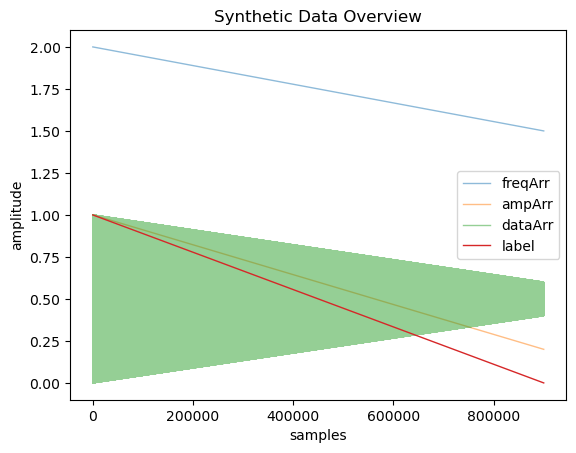

In [21]:
plt.plot(freqArr,lw=1,alpha=0.5,label='freqArr')
plt.plot(ampArr,lw=1,alpha=0.5,label='ampArr')
plt.plot(dataArr,lw=1,alpha=0.5,label='dataArr')
plt.plot(labelArr,lw=1,alpha=1,label='label')
plt.title('Synthetic Data Overview')
plt.ylabel('amplitude')
plt.xlabel('samples')
plt.legend()

plt.show()

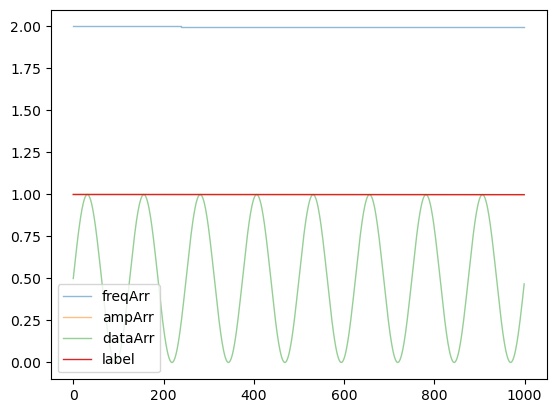

In [22]:
a,b = 0,1000
plt.plot(freqArr[a:b],lw=1,alpha=0.5,label='freqArr')
plt.plot(ampArr[a:b],lw=1,alpha=0.5,label='ampArr')
plt.plot(dataArr[a:b],lw=1,alpha=0.5,label='dataArr')
plt.plot(labelArr[a:b],lw=1,alpha=1,label='label')
plt.legend()

plt.show()

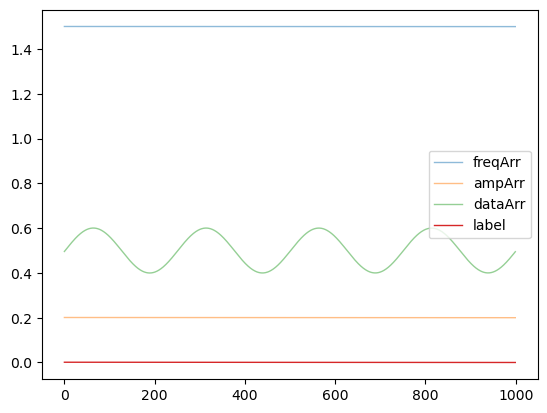

In [23]:
a,b = numSamples - 1000,numSamples
plt.plot(freqArr[a:b],lw=1,alpha=0.5,label='freqArr')
plt.plot(ampArr[a:b],lw=1,alpha=0.5,label='ampArr')
plt.plot(dataArr[a:b],lw=1,alpha=0.5,label='dataArr')
plt.plot(labelArr[a:b],lw=1,alpha=1,label='label')
plt.legend()

plt.show()

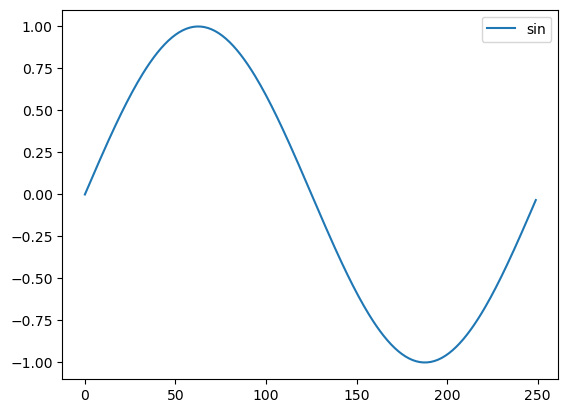

In [24]:
t = np.linspace(0,250,250)
s = np.sin(t/40)

plt.plot(s,label='sin')
plt.legend()
plt.show()


In [25]:


# 5.0 WRITE OUTPUT CSV's

outColumns = [
    "userID",
    "time",
    "x-axis",
    "y-axis",
    "z-axis",
    "ECG",
    "session",
    "WP",
    "WPName",
    "surface",
    "slope",
    "activity",
    "FTT",
]  # define all columns names
# make a clean copy of just what is required for the CSV file
dfOut = pd.DataFrame(columns=outColumns)
dfOut["userID"] = np.zeros(numSamples)
dfOut["time"] = np.zeros(numSamples)
dfOut["x-axis"] = dataArr
dfOut["y-axis"] = dataArr
dfOut["z-axis"] = dataArr
dfOut["ECG"] = dataArr
dfOut["session"] = np.zeros(numSamples)
dfOut["WP"] = np.zeros(numSamples)
dfOut["WPName"] = np.zeros(numSamples)
dfOut["surface"] = np.zeros(numSamples)
dfOut["slope"] = np.zeros(numSamples)
dfOut["activity"] = activityArr
dfOut["FTT"] = labelArr

# enforce column order
# dfOut = dfOut[outColumns].dropna()
# write to CSV file
# dfTraining = dfOut.copy().dropna()  # copy and drop empty rows
outputFile = 'dataset_syntheticIMU5'
dfOut.to_csv(outputFile + ".csv", sep=",", encoding="utf-8", index=True, header=True)



# _____PLOT DATA _____


print("END")


END


In [30]:
dfOut

,userID,time,x-axis,y-axis,z-axis,ECG,session,WP,WPName,surface,slope,activity,FTT
0,0.0,0.0,0.500000,0.500000,0.500000,0.500000,0.0,0.0,0.0,0.0,0.0,run down,1.000000
1,0.0,0.0,0.525122,0.525122,0.525122,0.525122,0.0,0.0,0.0,0.0,0.0,run down,0.999999
2,0.0,0.0,0.550181,0.550181,0.550181,0.550181,0.0,0.0,0.0,0.0,0.0,run down,0.999998
3,0.0,0.0,0.575112,0.575112,0.575112,0.575112,0.0,0.0,0.0,0.0,0.0,run down,0.999997
4,0.0,0.0,0.599854,0.599854,0.599854,0.599854,0.0,0.0,0.0,0.0,0.0,run down,0.999996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,0.0,0.0,0.484629,0.484629,0.484629,0.484629,0.0,0.0,0.0,0.0,0.0,run down,0.000004
899996,0.0,0.0,0.487117,0.487117,0.487117,0.487117,0.0,0.0,0.0,0.0,0.0,run down,0.000003
899997,0.0,0.0,0.489613,0.489613,0.489613,0.489613,0.0,0.0,0.0,0.0,0.0,run down,0.000002
899998,0.0,0.0,0.492116,0.492116,0.492116,0.492116,0.0,0.0,0.0,0.0,0.0,run down,0.000001
